In [42]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [43]:
import plotly.graph_objects as go
import plotly.express as px

In [44]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [45]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Times")
sns.set_context(font_scale=0.8)

### ƒCO2 against DIC - Baseline

In [46]:
dic_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/DIC&ALK_Baseline_7.0_cropped.nc', decode_times=True).sel(deptht=slice(0, 150))

In [47]:
fco2_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/FCO2/fco2_baseline_7.0_cropped.nc')

In [48]:
dic_baseline = dic_baseline.where(dic_baseline)

In [49]:
fco2_baseline = fco2_baseline.fco2[0,:]
fco2_baseline = fco2_baseline.to_dataset(name='fco2')

In [50]:
start_date = "2090-01-01"
end_date = "2100-01-01"

fco2_frame_baseline = fco2_baseline.sel(time_counter=slice(start_date, end_date))
fco2_frame_baseline = fco2_frame_baseline.fco2.mean(dim=('y', 'x'))

In [51]:
start_date = "2090-01-01"
end_date = "2100-01-01"

dic_frame_baseline = dic_baseline.sel(time_counter=slice(start_date, end_date))
dic_frame_baseline = dic_frame_baseline.DIC.mean(dim=('y', 'x', 'deptht'))

In [52]:
fco2_frame_baseline = fco2_frame_baseline.to_dataframe('fco2')
dic_frame_baseline = dic_frame_baseline.to_dataframe('DIC')

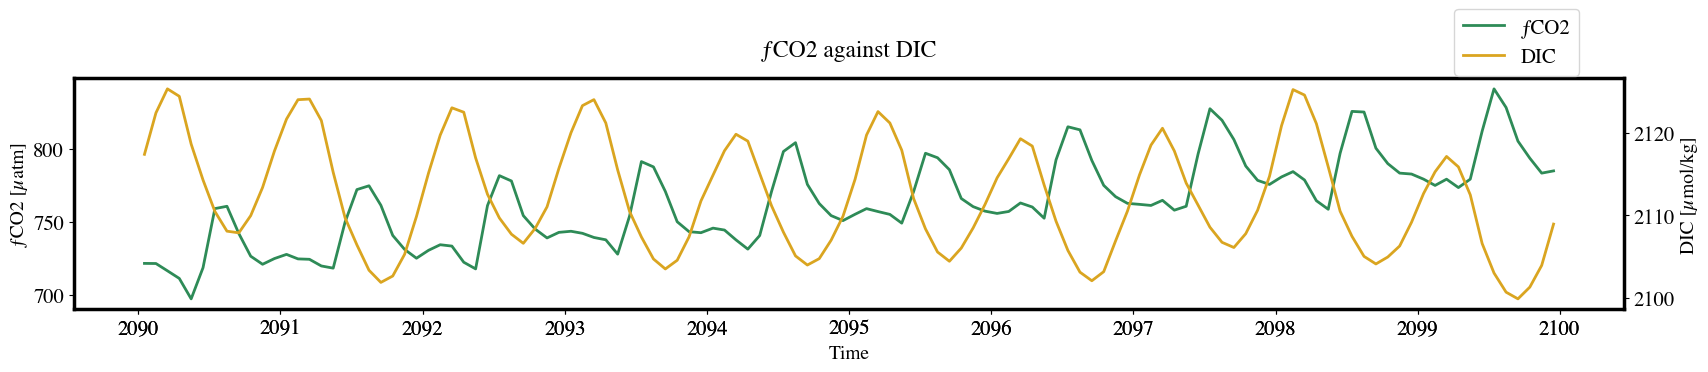

In [53]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(fco2_frame_baseline.index, fco2_frame_baseline.fco2, linewidth=2, color="seagreen", label = 'ƒCO2')
ax.set_ylabel('ƒCO2 [µatm]', fontsize=14)

ax2.plot(dic_frame_baseline.index, dic_frame_baseline.DIC, linewidth=2, color="goldenrod", label = 'DIC')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('DIC [µmol/kg]', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('ƒCO2 against DIC', fontname="Times", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.81, 1), loc='center left')
plt.show()

### ƒCO2 against DIC - Baseline (annual average)

In [54]:
mean_dic_baseline = dic_frame_baseline.groupby(dic_frame_baseline.index.month).DIC.mean()
mean_dic_baseline = mean_dic_baseline.reset_index()
mean_dic_baseline['time_counter'] = mean_dic_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_dic_baseline = mean_dic_baseline.set_index('time_counter')

In [55]:
mean_fco2_baseline = fco2_frame_baseline.groupby(fco2_frame_baseline.index.month).fco2.mean()
mean_fco2_baseline = mean_fco2_baseline.reset_index()
mean_fco2_baseline['time_counter']= mean_fco2_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_fco2_baseline = mean_fco2_baseline.set_index('time_counter')

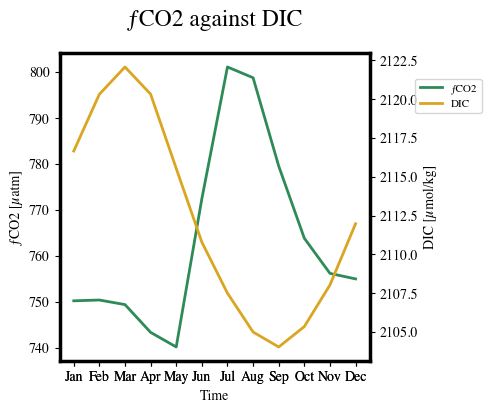

In [56]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(mean_fco2_baseline.index, mean_fco2_baseline.fco2, linewidth=2, color="seagreen", label = 'ƒCO2')
ax.set_ylabel('ƒCO2 [µatm]', fontsize=10)

ax2.plot(mean_dic_baseline.index, mean_dic_baseline.DIC, linewidth=2, color="goldenrod", label = 'DIC')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('DIC [µmol/kg]', fontsize=10)

plt.xlabel("Time", fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)

plt.title('ƒCO2 against DIC', fontname="Times", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(1, 0.83), loc='upper left', fontsize=8)
plt.show()

### ƒCO2 against DIC - OAE

In [57]:
dic_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/DIC&ALK_OAE_7.0_cropped.nc', decode_times=True).sel(deptht=slice(0, 150))

In [58]:
fco2_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/FCO2/fco2_OAE_7.0_cropped.nc')

In [59]:
dic_oae = dic_oae.where(dic_oae)

In [60]:
fco2_oae = fco2_oae.fco2[0,:]
fco2_oae = fco2_oae.to_dataset(name='fco2')

In [61]:
start_date = "2090-01-01"
end_date = "2100-01-01"

fco2_frame_oae = fco2_oae.sel(time_counter=slice(start_date, end_date))
fco2_frame_oae = fco2_frame_oae.fco2.mean(dim=('y', 'x'))

In [62]:
start_date = "2090-01-01"
end_date = "2100-01-01"

dic_frame_oae = dic_oae.sel(time_counter=slice(start_date, end_date))
dic_frame_oae = dic_frame_oae.DIC.mean(dim=('y', 'x', 'deptht'))

In [63]:
fco2_frame_oae = fco2_frame_oae.to_dataframe('fco2')
dic_frame_oae = dic_frame_oae.to_dataframe('DIC')

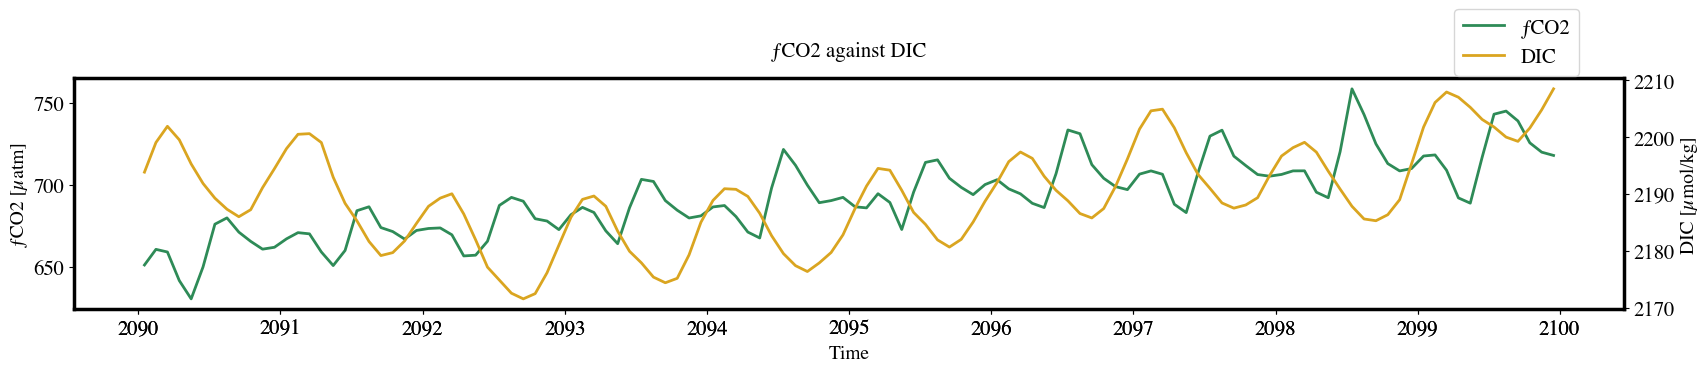

In [64]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(fco2_frame_oae.index, fco2_frame_oae.fco2, linewidth=2, color="seagreen", label = 'ƒCO2')
ax.set_ylabel('ƒCO2 [µatm]', fontsize=14)

ax2.plot(dic_frame_oae.index, dic_frame_oae.DIC, linewidth=2, color="goldenrod", label = 'DIC')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('DIC [µmol/kg]', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('ƒCO2 against DIC', fontname="Times", fontsize=15, y=1.06)
fig.legend(bbox_to_anchor=(0.81, 1), loc='center left')
plt.show()

### ƒCO2 against DIC - OAE (annual average)

In [65]:
mean_dic_oae = dic_frame_oae.groupby(dic_frame_oae.index.month).DIC.mean()
mean_dic_oae = mean_dic_oae.reset_index()
mean_dic_oae['time_counter'] = mean_dic_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_dic_oae = mean_dic_oae.set_index('time_counter')

In [66]:
mean_fco2_oae = fco2_frame_oae.groupby(fco2_frame_oae.index.month).fco2.mean()
mean_fco2_oae = mean_fco2_oae.reset_index()
mean_fco2_oae['time_counter']= mean_fco2_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_fco2_oae = mean_fco2_oae.set_index('time_counter')

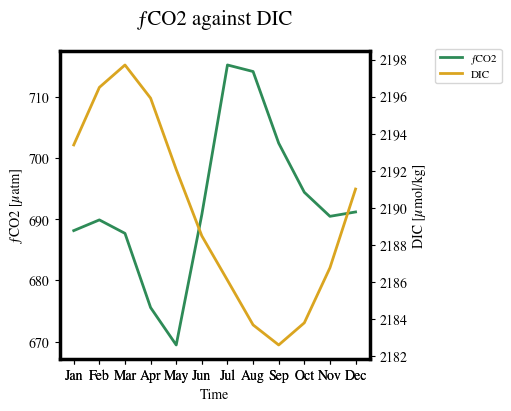

In [67]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(mean_fco2_oae.index, mean_fco2_oae.fco2, linewidth=2, color="seagreen", label = 'ƒCO2')
ax.set_ylabel('ƒCO2 [µatm]', fontsize=10)

ax2.plot(mean_dic_oae.index, mean_dic_oae.DIC, linewidth=2, color="goldenrod", label = 'DIC')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('DIC [µmol/kg]', fontsize=10)

plt.xlabel("Time", fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)

plt.title('ƒCO2 against DIC', fontname="Times", fontsize=15, y=1.06)
fig.legend(bbox_to_anchor=(1.05, 0.9), loc='upper left', fontsize=8)
plt.show()

### ƒCO2 against Alkalinity - Baseline

In [68]:
alk_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/DIC&ALK_Baseline_7.0_cropped.nc', decode_times=True).sel(deptht=slice(0, 150))

In [69]:
alk_baseline = alk_baseline.where(alk_baseline)

In [70]:
start_date = "2090-01-01"
end_date = "2100-01-01"

alk_frame_baseline = alk_baseline.sel(time_counter=slice(start_date, end_date))
alk_frame_baseline = alk_frame_baseline.ALK.mean(dim=('y', 'x', 'deptht'))

In [71]:
alk_frame_baseline = alk_frame_baseline.to_dataframe('ALK')

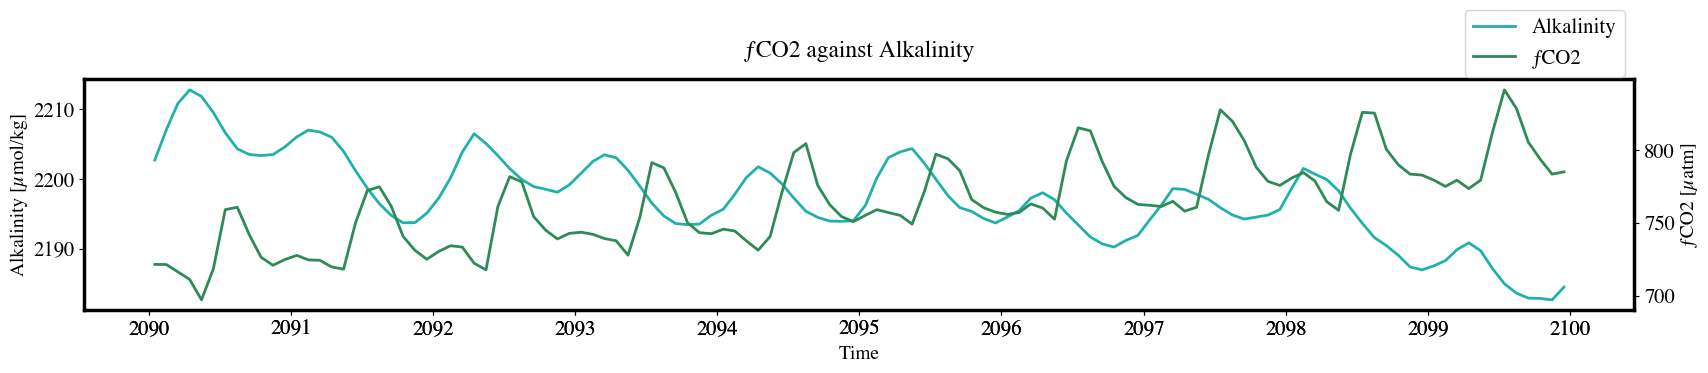

In [72]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(alk_frame_baseline.index, alk_frame_baseline.ALK, linewidth=2, color="lightseagreen", label = 'Alkalinity')
ax.set_ylabel('Alkalinity [µmol/kg]', fontsize=14)

ax2.plot(fco2_frame_baseline.index, fco2_frame_baseline.fco2, linewidth=2, color="seagreen", label = 'ƒCO2')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('ƒCO2 [µatm]', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('ƒCO2 against Alkalinity', fontname="Times", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.81, 1), loc='center left')
plt.show()

### ƒCO2 against Alkalinity - Baseline (annual average)

In [73]:
mean_alk_baseline = alk_frame_baseline.groupby(alk_frame_baseline.index.month).ALK.mean()
mean_alk_baseline = mean_alk_baseline.reset_index()
mean_alk_baseline['time_counter']= mean_alk_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_alk_baseline = mean_alk_baseline.set_index('time_counter')

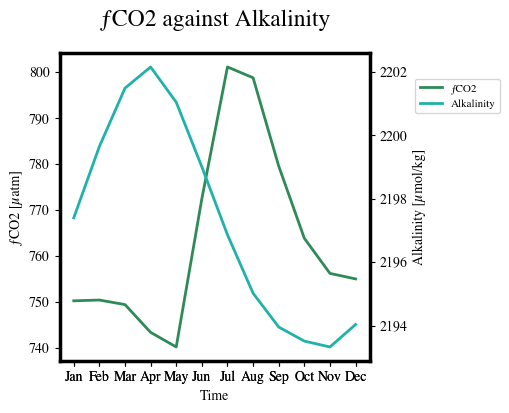

In [74]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(mean_fco2_baseline.index, mean_fco2_baseline.fco2, linewidth=2, color="seagreen", label = 'ƒCO2')
ax.set_ylabel('ƒCO2 [µatm]', fontsize=10)

ax2.plot(mean_alk_baseline.index, mean_alk_baseline.ALK, linewidth=2, color="lightseagreen", label = 'Alkalinity')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('Alkalinity [µmol/kg]', fontsize=10)

plt.xlabel("Time", fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)

plt.title('ƒCO2 against Alkalinity', fontname="Times", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(1, 0.83), loc='upper left', fontsize=8)
plt.show()

### ƒCO2 against Alkalinity - OAE

In [75]:
alk_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/DIC&ALK_OAE_7.0_cropped.nc', decode_times=True).sel(deptht=slice(0, 150))

In [76]:
alk_oae = alk_oae.where(alk_oae)

In [77]:
start_date = "2090-01-01"
end_date = "2100-01-01"

alk_frame_oae = alk_oae.sel(time_counter=slice(start_date, end_date))
alk_frame_oae = alk_frame_oae.ALK.mean(dim=('y', 'x', 'deptht'))

In [78]:
alk_frame_oae = alk_frame_oae.to_dataframe('ALK')

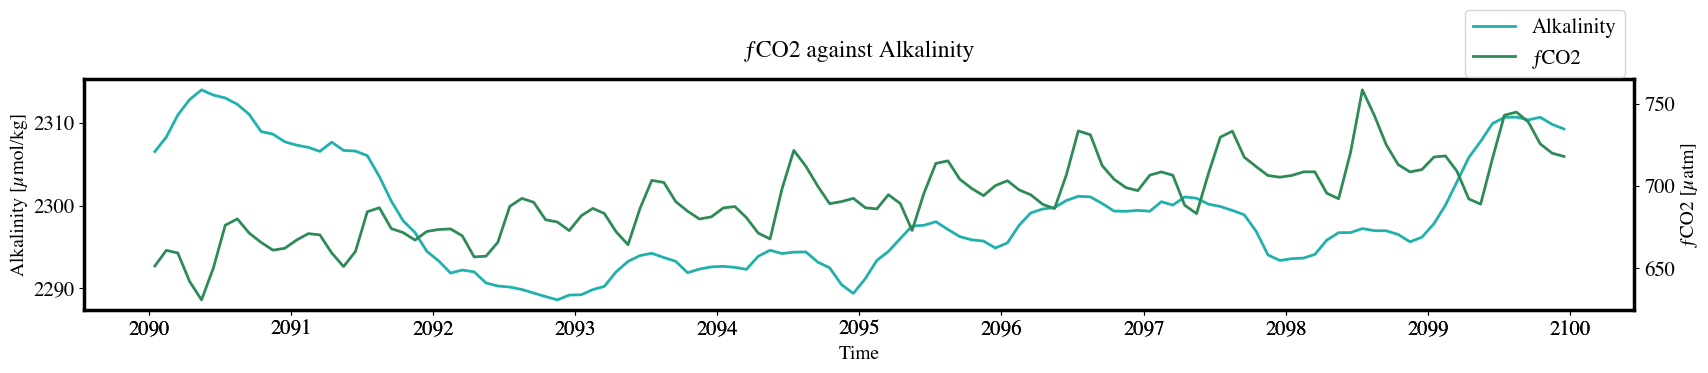

In [79]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(alk_frame_oae.index, alk_frame_oae.ALK, linewidth=2, color="lightseagreen", label = 'Alkalinity')
ax.set_ylabel('Alkalinity [µmol/kg]', fontsize=14)

ax2.plot(fco2_frame_oae.index, fco2_frame_oae.fco2, linewidth=2, color="seagreen", label = 'ƒCO2')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('ƒCO2 [µatm]', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('ƒCO2 against Alkalinity', fontname="Times", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.81, 1), loc='center left')
plt.show()

### ƒCO2 against Alkalinity - Baseline (annual average)

In [80]:
mean_alk_oae = alk_frame_oae.groupby(alk_frame_oae.index.month).ALK.mean()
mean_alk_oae = mean_alk_oae.reset_index()
mean_alk_oae['time_counter']= mean_alk_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_alk_oae = mean_alk_oae.set_index('time_counter')

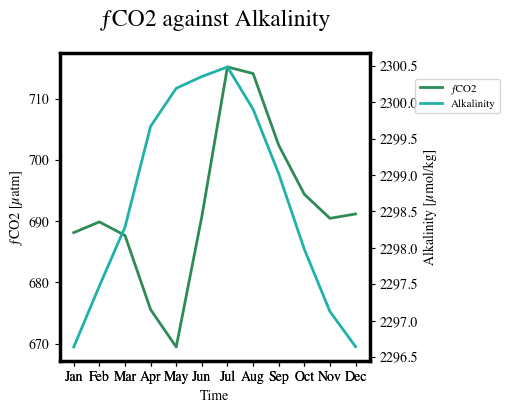

In [81]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(mean_fco2_oae.index, mean_fco2_oae.fco2, linewidth=2, color="seagreen", label = 'ƒCO2')
ax.set_ylabel('ƒCO2 [µatm]', fontsize=10)

ax2.plot(mean_alk_oae.index, mean_alk_oae.ALK, linewidth=2, color="lightseagreen", label = 'Alkalinity')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('Alkalinity [µmol/kg]', fontsize=10)

plt.xlabel("Time", fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)

plt.title('ƒCO2 against Alkalinity', fontname="Times", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(1, 0.83), loc='upper left', fontsize=8)
plt.show()

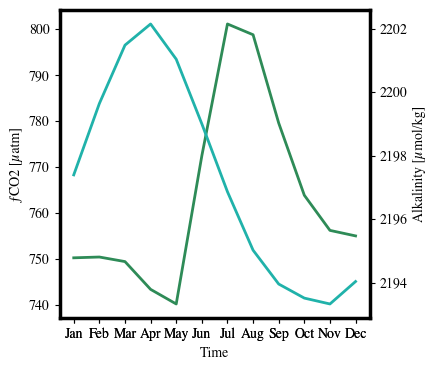

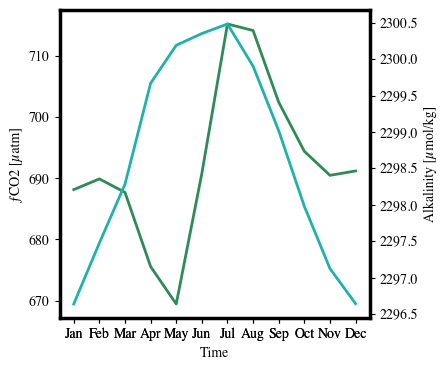

In [82]:
fig1 = plt.figure(figsize=(4, 4))
ax1 = fig1.add_subplot(111, label="1")
ax2 = fig1.add_subplot(111, label="2", frame_on=False)

ax1.plot(mean_fco2_baseline.index, mean_fco2_baseline.fco2, linewidth=2, color="seagreen", label = 'ƒCO2')
ax1.set_ylabel('ƒCO2 [µatm]', fontsize=10)

ax2.plot(mean_alk_baseline.index, mean_alk_baseline.ALK, linewidth=2, color="lightseagreen", label = 'Alkalinity')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('Alkalinity [µmol/kg]', fontsize=10)

plt.xlabel("Time", fontsize=10)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)

fig2 = plt.figure(figsize=(8.8, 4))
ax3 = fig2.add_subplot(121, label="1")
ax4 = fig2.add_subplot(121, label="2", frame_on=False)

ax3.plot(mean_fco2_oae.index, mean_fco2_oae.fco2, linewidth=2, color="seagreen", label = 'ƒCO2')
ax3.set_ylabel('ƒCO2 [µatm]', fontsize=10)

ax4.plot(mean_alk_oae.index, mean_alk_oae.ALK, linewidth=2, color="lightseagreen", label = 'Alkalinity')
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position('right') 
ax4.set_ylabel('Alkalinity [µmol/kg]', fontsize=10)

plt.xlabel("Time", fontsize=10)
ax3.tick_params(axis='both', which='major', labelsize=10)
ax4.tick_params(axis='both', which='major', labelsize=10)

In [83]:
co2flux_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/CO2flux/CO2flux_Baseline_7.0_cropped.nc')

In [84]:
ph_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/pH/ph_baseline_7.0_cropped.nc')

In [85]:
co2flux_baseline = co2flux_baseline.co2flux * 31536000
co2flux_baseline = co2flux_baseline / 0.04401 # mol/m2/yr CO2

In [86]:
co2flux_baseline = co2flux_baseline.to_dataset(name='co2flux')

In [87]:
co2flux_baseline = co2flux_baseline.co2flux[0,:]
co2flux_baseline = co2flux_baseline.to_dataset(name='co2flux')

In [88]:
start_date = "2090-01-01"
end_date = "2100-01-01"

co2flux_frame_baseline = co2flux_baseline.sel(time_counter=slice(start_date, end_date))
co2flux_frame_baseline = co2flux_frame_baseline.co2flux.mean(dim=('y', 'x'))

In [89]:
co2flux_frame_baseline = co2flux_frame_baseline.to_dataframe('co2flux')

In [90]:
mean_co2flux_baseline = co2flux_frame_baseline.groupby(co2flux_frame_baseline.index.month).co2flux.mean()
mean_co2flux_baseline = mean_co2flux_baseline.reset_index()
mean_co2flux_baseline['time_counter']= mean_co2flux_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_co2flux_baseline = mean_co2flux_baseline.set_index('time_counter')

In [91]:
ph_baseline = ph_baseline.ph[0,:]
ph_baseline = ph_baseline.to_dataset(name='ph')

In [92]:
start_date = "2090-01-01"
end_date = "2100-01-01"

ph_frame_baseline = ph_baseline.sel(time_counter=slice(start_date, end_date))
ph_frame_baseline = ph_frame_baseline.ph.mean(dim=('y', 'x'))

In [93]:
ph_frame_baseline = ph_frame_baseline.to_dataframe('ph')

In [94]:
mean_ph_baseline = ph_frame_baseline.groupby(ph_frame_baseline.index.month).ph.mean()
mean_ph_baseline = mean_ph_baseline.reset_index()
mean_ph_baseline['time_counter'] = mean_ph_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_ph_baseline = mean_ph_baseline.set_index('time_counter')

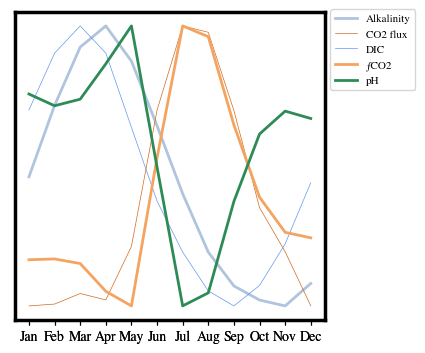

In [110]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, label="1", frame_on=True)
ax2 = fig.add_subplot(111, label="2", frame_on=False)
ax3 = fig.add_subplot(111, label="3", frame_on=False)
ax4 = fig.add_subplot(111, label="4", frame_on=False)
ax5 = fig.add_subplot(111, label="5", frame_on=False)

ax.plot(mean_alk_baseline.index, mean_alk_baseline.ALK, linewidth=2, color="lightsteelblue", label = 'Alkalinity')
ax.set_xticks([], [])

ax2.plot(mean_co2flux_baseline.index, mean_co2flux_baseline.co2flux, linewidth=0.5, color="chocolate", label = 'CO2 flux')
ax2.set_xticks([], [])

ax3.plot(mean_dic_baseline.index, mean_dic_baseline.DIC, linewidth=0.5, color="cornflowerblue", label = 'DIC')
ax3.set_xticks([], [])

ax4.plot(mean_fco2_baseline.index, mean_fco2_baseline.fco2, linewidth=2, color="sandybrown", label = 'ƒCO2')
ax4.tick_params(axis='both', which='major', labelsize=10)

ax5.plot(mean_ph_baseline.index, mean_ph_baseline.ph, linewidth=2, color="seagreen", label = 'pH')
ax5.tick_params(axis='both', which='major', labelsize=10)

axl = [ax, ax2, ax3, ax4, ax5]

for x in axl:
    x.set_yticks([], [])

fig.legend(bbox_to_anchor=(0.9, 0.9), loc='upper left', fontsize=8)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/variable_comparison_baseline.png')

In [96]:
co2flux_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/CO2flux/CO2flux_OAE_7.0_cropped.nc')

In [97]:
ph_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/pH/ph_OAE_7.0_cropped.nc')

In [98]:
co2flux_oae = co2flux_oae.co2flux * 31536000
co2flux_oae = co2flux_oae / 0.04401 # mol/m2/yr CO2

In [99]:
co2flux_oae = co2flux_oae.to_dataset(name='co2flux')

In [100]:
co2flux_oae = co2flux_oae.co2flux[0,:]
co2flux_oae = co2flux_oae.to_dataset(name='co2flux')

In [101]:
start_date = "2090-01-01"
end_date = "2100-01-01"

co2flux_frame_oae = co2flux_oae.sel(time_counter=slice(start_date, end_date))
co2flux_frame_oae = co2flux_frame_oae.co2flux.mean(dim=('y', 'x'))

In [102]:
co2flux_frame_oae = co2flux_frame_oae.to_dataframe('co2flux')

In [103]:
mean_co2flux_oae = co2flux_frame_oae.groupby(co2flux_frame_oae.index.month).co2flux.mean()
mean_co2flux_oae = mean_co2flux_oae.reset_index()
mean_co2flux_oae['time_counter']= mean_co2flux_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_co2flux_oae = mean_co2flux_oae.set_index('time_counter')

In [104]:
ph_oae = ph_oae.ph[0,:]
ph_oae = ph_oae.to_dataset(name='ph')

In [105]:
start_date = "2090-01-01"
end_date = "2100-01-01"

ph_frame_oae = ph_oae.sel(time_counter=slice(start_date, end_date))
ph_frame_oae = ph_frame_oae.ph.mean(dim=('y', 'x'))

In [106]:
ph_frame_oae = ph_frame_oae.to_dataframe('ph')

In [107]:
mean_ph_oae = ph_frame_oae.groupby(ph_frame_oae.index.month).ph.mean()
mean_ph_oae = mean_ph_oae.reset_index()
mean_ph_oae['time_counter'] = mean_ph_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_ph_oae = mean_ph_oae.set_index('time_counter')

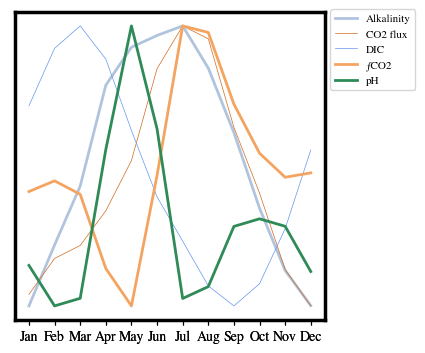

In [109]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, label="1", frame_on=True)
ax2 = fig.add_subplot(111, label="2", frame_on=False)
ax3 = fig.add_subplot(111, label="3", frame_on=False)
ax4 = fig.add_subplot(111, label="4", frame_on=False)
ax5 = fig.add_subplot(111, label="5", frame_on=False)

ax.plot(mean_alk_oae.index, mean_alk_oae.ALK, linewidth=2, color="lightsteelblue", label = 'Alkalinity')
ax.set_xticks([], [])

ax2.plot(mean_co2flux_oae.index, mean_co2flux_oae.co2flux, linewidth=0.5, color="chocolate", label = 'CO2 flux')
ax2.set_xticks([], [])

ax3.plot(mean_dic_oae.index, mean_dic_oae.DIC, linewidth=0.5, color="cornflowerblue", label = 'DIC')
ax3.set_xticks([], [])

ax4.plot(mean_fco2_oae.index, mean_fco2_oae.fco2, linewidth=2, color="sandybrown", label = 'ƒCO2')
ax4.tick_params(axis='both', which='major', labelsize=10)

ax5.plot(mean_ph_oae.index, mean_ph_oae.ph, linewidth=2, color="seagreen", label = 'pH')
ax5.tick_params(axis='both', which='major', labelsize=10)

axl = [ax, ax2, ax3, ax4, ax5]

for x in axl:
    x.set_yticks([], [])

fig.legend(bbox_to_anchor=(0.9, 0.9), loc='upper left', fontsize=8)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/variable_comparison_oae.png')